In [3]:
import numpy as np
import h5py
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import torch
from torchvision import datasets, transforms, utils
from skimage import io, transform
#from matplotlib.pyplot import imshow, pause


/home/carina/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [30]:
files_acdc = np.load("acdc_al_splits.npy", allow_pickle = True)

In [34]:
len(files_acdc.item().values())

4

In [32]:
d_s = files_acdc.item()['d_s']
print("length of d_s: ", len(d_s))
d_t = files_acdc.item()['d_t']
print("length of d_t: ", len(d_t))
d_v = files_acdc.item()['d_v']
print("length of d_v: ", len(d_v))
d_r = files_acdc.item()['d_r']
print("length of d_r: ", len(d_r))

length of d_s:  1
length of d_t:  10
length of d_v:  39
length of d_r:  10


In [25]:
files = np.load("cityscapes_al_splits.npy", allow_pickle = True)

In [26]:
files.item().keys()

dict_keys(['d_s', 'd_t', 'd_r', 'd_v'])

In [28]:
d_s = files.item()['d_s']
print("length of d_s: ", len(d_s))
d_t = files.item()['d_t']
print("length of d_t: ", len(d_t))
d_v = files.item()['d_v']
print("length of d_v: ", len(d_v))
d_r = files.item()['d_r']
print("length of d_r: ", len(d_r))


length of d_s:  10
length of d_t:  150
length of d_v:  2615
length of d_r:  200


In [2]:
img_npy = '/mnt/qb/baumgartner/cschmidt77_data/acdc/slices/train/pat_1_diag_2_frame_01_slice_0.npy'

In [3]:
mask_npy = '/mnt/qb/baumgartner/cschmidt77_data/acdc/gt/train/pat_7_diag_2_frame_01_slice_4.npy'

In [4]:
np_mask = np.load(mask_npy)

In [5]:
np_mask.size

65536

In [6]:
np_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
splits = np.load('acdc_pat_img_splits.npy', allow_pickle=True).item()

In [26]:
splits['d_t']

['pat_10_diag_2_frame_01_slice_0.npy',
 'pat_10_diag_2_frame_01_slice_1.npy',
 'pat_10_diag_2_frame_01_slice_2.npy',
 'pat_10_diag_2_frame_01_slice_3.npy',
 'pat_10_diag_2_frame_01_slice_4.npy',
 'pat_10_diag_2_frame_01_slice_5.npy',
 'pat_10_diag_2_frame_01_slice_6.npy',
 'pat_10_diag_2_frame_01_slice_7.npy',
 'pat_10_diag_2_frame_01_slice_8.npy',
 'pat_10_diag_2_frame_01_slice_9.npy',
 'pat_10_diag_2_frame_13_slice_0.npy',
 'pat_10_diag_2_frame_13_slice_1.npy',
 'pat_10_diag_2_frame_13_slice_2.npy',
 'pat_10_diag_2_frame_13_slice_3.npy',
 'pat_10_diag_2_frame_13_slice_4.npy',
 'pat_10_diag_2_frame_13_slice_5.npy',
 'pat_10_diag_2_frame_13_slice_6.npy',
 'pat_10_diag_2_frame_13_slice_7.npy',
 'pat_10_diag_2_frame_13_slice_8.npy',
 'pat_10_diag_2_frame_13_slice_9.npy',
 'pat_22_diag_3_frame_01_slice_0.npy',
 'pat_22_diag_3_frame_01_slice_1.npy',
 'pat_22_diag_3_frame_01_slice_2.npy',
 'pat_22_diag_3_frame_01_slice_3.npy',
 'pat_22_diag_3_frame_01_slice_4.npy',
 'pat_22_diag_3_frame_01_

In [21]:
torch.from_numpy(np.array(np_mask)).long().dtype

torch.int64

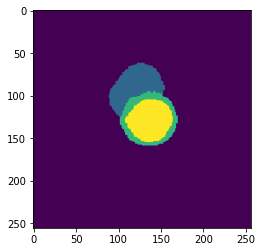

In [13]:
mask = Image.fromarray(np_mask.astype(np.uint8))
plt.imshow(mask)

In [14]:
im_mask = Image.fromarray(np_mask)

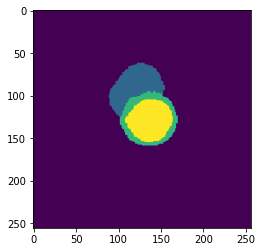

In [15]:
plt.imshow(im_mask)

In [22]:
np_img = np.load(img_npy)

In [28]:
np.array(np_img).shape

(256, 256)

In [30]:
np_img[:,::-1].shape




(256, 256)

In [18]:
np_img.max()

443.1431

In [24]:
np_img.dtype

dtype('float32')

In [34]:
img_stacked = np.stack((np_img,)*3, axis=-1)

In [25]:
img_stacked.dtype


dtype('float32')

In [35]:
img_tensor = torch.from_numpy(img_stacked).type(torch.float32)

In [36]:
img_tensor.max()

tensor(443.1431)

In [46]:
transf_img = np.fliplr(img_tensor)

In [47]:
transf_img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [27]:
img_tensor_normalized = transforms.normalize(img_tensor)

AttributeError: module 'torchvision.transforms' has no attribute 'normalize'

In [15]:
img_stacked.astype(np.uint16).max()

443

In [77]:
pat = 'la_pat_003_slice_50'

In [80]:
img_path = '/mnt/qb/baumgartner/cschmidt77_data/msd_heart/slices/%s.npy' % pat
mask_path = '/mnt/qb/baumgartner/cschmidt77_data/msd_heart/gt/%s.npy'  % pat

In [82]:
img = np.load(img_path)
mask = np.load(mask_path)

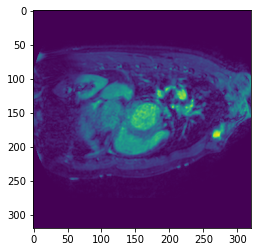

In [87]:
plt.imshow(img)

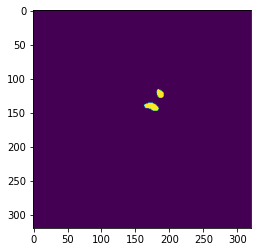

In [88]:
plt.imshow(mask)

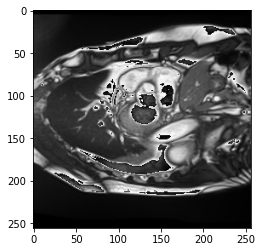

In [63]:
plt.imshow(img_stacked.astype(np.uint8))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


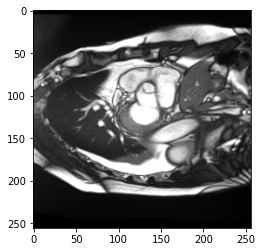

In [18]:
plt.imshow(img_stacked.astype(np.uint16))

In [20]:
im_fromArray = Image.fromarray(img_stacked.astype(np.uint8))

In [69]:
img_stacked.size

196608

In [37]:
img_stacked_255 = img_stacked*255

In [31]:
img_uint8 = img_stacked.astype(np.uint8)

In [32]:
img_uint8.min(), img_uint8.max()

(0, 255)

In [33]:
image_rgb = Image.fromarray(img_stacked.astype(np.uint8))

In [34]:
image_rgb_255 = Image.fromarray(img_stacked_255.astype(np.uint8))

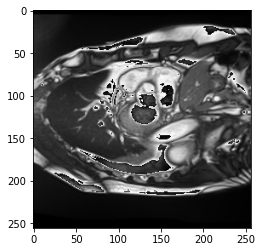

In [35]:
plt.imshow(image_rgb)

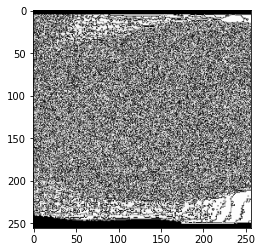

In [36]:
plt.imshow(image_rgb_255)

In [25]:
im_rgb = Image.fromarray(random)

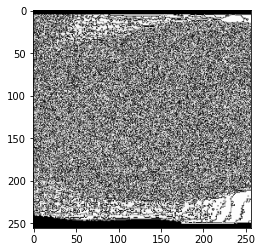

In [26]:
plt.imshow(im_rgb)

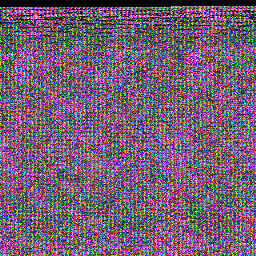

In [24]:
im_rgb

In [46]:
mask_array = np.load(mask_npy)

In [47]:
mask_array.max()

3

In [53]:
im = Image.fromarray(image_array)
im.show()

<Figure size 432x288 with 0 Axes>

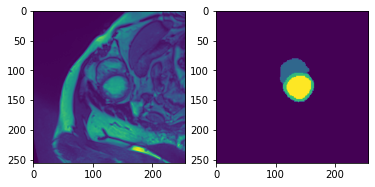

In [49]:
#plt.imshow(mask_array, cmap='gray')
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(image_array)
axarr[1].imshow(mask_array)

In [92]:
data = np.load(img_npy)

In [93]:
data.max()

254.7985076904297

In [85]:
data.shape

(256, 256)

In [84]:
a = data.reshape(256, 256, 3)

ValueError: cannot reshape array of size 65536 into shape (256,256,3)

In [94]:
stacked_img = np.stack((data,)*3, axis=-1)

In [96]:
stacked_img.shape

(256, 256, 3)

In [87]:
img = Image.fromarray(data, 'RGB')

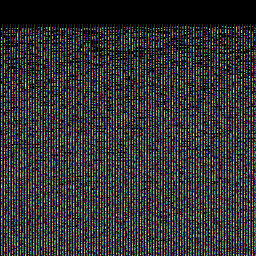

In [88]:
img

In [77]:
image_path = '/mnt/qb/baumgartner/cschmidt77_data/acdc/slices/train/pat_1_diag_2_frame_12_slice_5.png'

In [64]:
image_path

'/mnt/qb/baumgartner/cschmidt77_data/acdc/slices/train/pat_1_diag_2_frame_12_slice_5.png'

In [61]:
image = plt.imread(image_path)

In [72]:
image[100:120,100:120]

array([[[0.17254902, 0.17254902, 0.17254902],
        [0.18039216, 0.18039216, 0.18039216],
        [0.16862746, 0.16862746, 0.16862746],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.16862746, 0.16862746, 0.16862746],
        [0.16470589, 0.16470589, 0.16470589],
        [0.16470589, 0.16470589, 0.16470589],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.17254902, 0.17254902, 0.17254902],
        [0.16862746, 0.16862746, 0.16862746],
        [0.18039216, 0.18039216, 0.18039216],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.9372549 , 0.9372549 , 0.9372549 ]],

       ...,

       [[0.21960784, 0.21960784, 0.21960784],
        [0.3764706 , 0.3764706 , 0.3764706 ],
        [0.28235295, 0

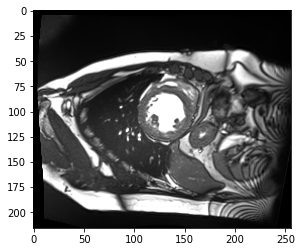

In [62]:
plt.imshow(image, cmap='gray')

In [28]:
image_mask = plt.imread(path)

In [75]:
image_mask[100:120,100:120]
print(np.unique(image_mask)*255)

[0. 1. 2. 3.]


In [31]:
np.nonzero(image_mask)

(array([ 67,  67,  67, ..., 129, 129, 129]),
 array([133, 133, 133, ..., 139, 139, 139]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [58]:
image_mask[67][133][0]

0.003921569

In [32]:
image_mask.shape

(216, 256, 3)

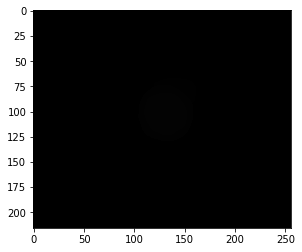

In [56]:
plt.imshow(image_mask, cmap='jet', interpolation='none')

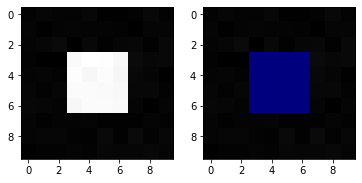

In [53]:
#### example
mask = np.zeros((10,10))
mask[3:-3, 3:-3] = 1 # white square in black background
im = mask + np.random.randn(10,10) * 0.01 # random image
masked = np.ma.masked_where(mask == 0, mask)

import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im, 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(im, 'gray', interpolation='none')
plt.imshow(masked, 'jet', interpolation='none', alpha=0.7)
plt.show()

TypeError: Image data of dtype <U96 cannot be converted to float

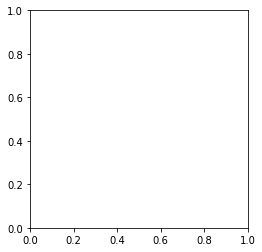

In [10]:
plt.imshow('/mnt/qb/baumgartner/cschmidt77_data/acdc_challenge/train/patient001/patient001_frame01_gt.nii.gz')

In [2]:
# show cityscapes al splits
cityscapes_al = np.load('cityscapes_al_splits.npy', allow_pickle=True)

In [3]:
#gets items inside npy array 
dict_cs =cityscapes_al.item()

In [4]:
dict_cs['d_s']

['bremen_000000_000019',
 'bremen_000196_000019',
 'darmstadt_000055_000019',
 'stuttgart_000167_000019',
 'tubingen_000102_000019',
 'jena_000082_000019',
 'hamburg_000000_106102',
 'hanover_000000_052887',
 'darmstadt_000082_000019',
 'hamburg_000000_068916']

In [5]:
#show acdc al splits 
acdc_splits = np.load('data_2D_size_256_256_res_1.36719_1.36719_al_splits.npy', allow_pickle=True)

In [6]:
acdc_splits.item()['d_S']

array([95, 73, 27])

In [7]:
filename = '/home/carina/baumgartner/cschmidt77/devel/ralis/acdc/preproc_data/test/data_2D_size_256_256_res_1.36719_1.36719.hdf5'

In [8]:
with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
    print(data)

Keys: <KeysViewHDF5 ['cardiac_phase_test', 'cardiac_phase_train', 'cardiac_phase_validation', 'diagnosis_test', 'diagnosis_train', 'diagnosis_validation', 'height_test', 'height_train', 'height_validation', 'images_test', 'images_train', 'images_validation', 'masks_test', 'masks_train', 'masks_validation', 'patient_id_test', 'patient_id_train', 'patient_id_validation', 'weight_test', 'weight_train', 'weight_validation']>
[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]


In [9]:
# show cityscapes al splits
np.load('data_2D_size_256_256_res_1.36719_1.36719_al_splits.npy', allow_pickle=True)

array({'d_S': array([95, 73, 27]), 'd_T': array([72, 70, 92, 16, 24, 50, 66,  8, 33]), 'd_R': array([84, 80, 44, 89, 29, 22, 96,  2, 54, 31, 40]), 'd_V': array([ 38,  15,  49,  83,  45,  58,  97,  75,  91,  77,  94,  13,  61,
       100,  85,  39,  87,   9,   4,  25,  30,  63,  28,  34,  53,  78,
        18,  41,  47,  99,  37,  56,   5,  79,  76,  21,  32,  43,  82,
         3,  48,  26,  64,   1,  93,  17,  86,  10,  65,  20,  90,  23,
        57,  67,  60,  71,  98,  59,   7,  14,  42,  68,  46,  55,  52,
        62,  74,  19,  88,  12,  36,  11,  81,  51,  35,   6,  69])},
      dtype=object)

In [10]:
#load one 4D MRI file
nii = nib.load('/mnt/qb/baumgartner/cschmidt77_data/acdc_challenge/train/patient001/patient001_4d.nii.gz')

In [11]:
data = nii.get_fdata()

In [12]:
data.shape

(216, 256, 10, 30)

In [13]:
# get first of 4th dimension (one time-step) resulting in 3D volume
first_volume = data[...,0]

In [14]:
first_volume.shape

(216, 256, 10)

In [10]:
frame12_gt = nib.load('/mnt/qb/baumgartner/cschmidt77_data/acdc_challenge/train/patient001/patient001_frame12_gt.nii.gz')

In [11]:
frame12_gt = frame12_gt.get_fdata()

In [12]:
frame12_gt.shape

(216, 256, 10)

In [18]:
np.nonzero(frame12)

(array([ 64,  64,  64, ..., 130, 130, 130]),
 array([119, 120, 121, ..., 133, 134, 135]),
 array([2, 2, 2, ..., 5, 5, 5]))

In [19]:
frame12.shape

(216, 256, 10)

In [20]:
frame12.shape[2]

10

In [13]:
import matplotlib.pyplot as plt

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [6]:
epi_img = nib.load('/home/carina/Downloads/someones_epi.nii.gz')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(53, 61, 33)

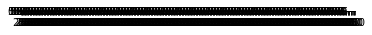

In [14]:
show_slices(frame12_gt)

Text(0.5, 0.98, 'Center slices for EPI image')

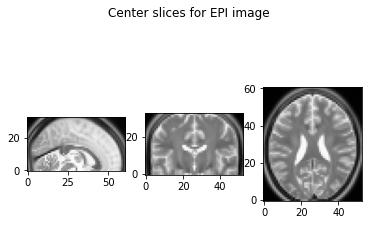

In [7]:
slice_0 = epi_img_data[26, :, :]
slice_1 = epi_img_data[:, 30, :]
slice_2 = epi_img_data[:, :, 14]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

In [23]:
def print_2D_slices_of_3D_volume(slices):
    """ Function to display row of image slices in one volume """
    #number of 2D images in volume (3d dimension)
    num_slices = len(slices[0,0,:])
    fig, axes = plt.subplots(1, num_slices, figsize=(20, 20))
    for i in range(0,num_slices):
        axes[i].imshow(slices[:,:,i], cmap='rainbow', origin="lower") 

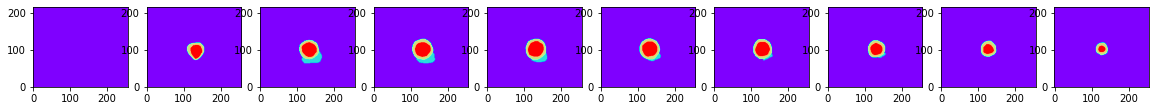

In [24]:
#ground truth
print_2D_slices_of_3D_volume(frame12_gt)

In [28]:
frame12_gt.max()

3.0

In [31]:
frame01 = nib.load('/mnt/qb/baumgartner/cschmidt77_data/acdc_challenge/train/patient001/patient001_frame01.nii.gz')

In [34]:
frame01 = frame01.get_fdata()

In [35]:
first_vol = frame01[...,0]

In [33]:
np.load('acdc_al_splits.npy', allow_pickle=True)

array({'d_s': ['pat_61'], 'd_t': ['pat_2', 'pat_10', 'pat_22', 'pat_30', 'pat_42', 'pat_50', 'pat_62', 'pat_70', 'pat_82', 'pat_90'], 'd_r': ['pat_19', 'pat_20', 'pat_39', 'pat_40', 'pat_59', 'pat_60', 'pat_79', 'pat_80', 'pat_99', 'pat_100'], 'd_v': ['pat_1', 'pat_3', 'pat_4', 'pat_5', 'pat_6', 'pat_7', 'pat_8', 'pat_9', 'pat_21', 'pat_23', 'pat_24', 'pat_25', 'pat_26', 'pat_27', 'pat_28', 'pat_29', 'pat_41', 'pat_43', 'pat_44', 'pat_45', 'pat_46', 'pat_47', 'pat_48', 'pat_49', 'pat_63', 'pat_64', 'pat_65', 'pat_66', 'pat_67', 'pat_68', 'pat_69', 'pat_81', 'pat_83', 'pat_84', 'pat_85', 'pat_86', 'pat_87', 'pat_88', 'pat_89']},
      dtype=object)

In [31]:
np.load('camvid_al_splits.npy', allow_pickle=True)

array({'d_s': ['0016E5_07620.png', '0016E5_05850.png', '0006R0_f02100.png', '0006R0_f01170.png', '0016E5_00901.png', '0016E5_05010.png', '0001TP_008400.png', '0016E5_08520.png', '0016E5_08460.png', '0001TP_007170.png'], 'd_t': ['0001TP_006690.png', '0001TP_006780.png', '0001TP_006870.png', '0001TP_006960.png', '0001TP_007050.png', '0001TP_007260.png', '0001TP_007320.png', '0001TP_007410.png', '0001TP_007530.png', '0001TP_007620.png', '0001TP_007650.png', '0001TP_007740.png', '0001TP_007800.png', '0001TP_007860.png', '0001TP_008100.png', '0001TP_008160.png', '0001TP_008340.png', '0001TP_008460.png', '0006R0_f00960.png', '0006R0_f01080.png', '0006R0_f01200.png', '0006R0_f01230.png', '0006R0_f01350.png', '0006R0_f01530.png', '0006R0_f01740.png', '0006R0_f01770.png', '0006R0_f01800.png', '0006R0_f01980.png', '0006R0_f02040.png', '0006R0_f02130.png', '0006R0_f02250.png', '0006R0_f02280.png', '0006R0_f02310.png', '0006R0_f02370.png', '0006R0_f02400.png', '0006R0_f02580.png', '0006R0_f02610.p

In [37]:
slice_0 = first_vol[1, :, :]
slice_1 = first_vol[:, 2, :]
slice_2 = first_vol[:, :, 5]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for ACDC image")

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [38]:
print_2D_slices_of_3D_volume(first_vol)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [39]:
# A slice over the third dimension of a 3D image
plt.imshow(first_vol[:,:,2], cmap='rainbow')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
'/mnt/qb/baumgartner/cschmidt77_data/acdc_challenge/train/patient001/patient001_frame12_gt.nii.gz'


In [2]:
def load_patient_frames(input_folder, size, target_resolution):   
    # iterate over all patient folders
    for folder in os.listdir(input_folder):
        # whole path to patient
        folder_path = os.path.join(input_folder, folder)

        if os.path.isdir(folder_path):
            # TODO splitting patients into train, test, val (regarding diseases)

            infos = {}
            for line in open(os.path.join(folder_path, 'Info.cfg')):
                label, value = line.split(':')
                if label == 'Group':
                    # get diagnosis code from dict 
                    infos[label] = diagnosis_dict[value.rstrip('\n').lstrip(' ')]
                    diag_list.append(infos[label])
                else:
                    infos[label] = value.rstrip('\n').lstrip(' ')
            systole_frame = int(infos['ES'])
            diastole_frame = int(infos['ED'])

            patient_id = folder.lstrip('patient')
            info_list.append(infos)

            #iterate over all frame files 
            #file contains full path to image
            for file in glob.glob(os.path.join(folder_path, 'patient???_frame??*.nii.gz')):

                file_list.append(file)
                systole_frame = int(infos['ES'])
                diastole_frame = int(infos['ED'])
                
                #directory and file name until dot
                file_dir_name = file.split('.')[0]
                # gives frame number (and gt)
                frame = file_dir_name.split('frame')[-1]

                # save codes for either systole or diastole to cardiac phase list (4 codes per patient)
                if str(systole_frame) in frame:
                    cardiac_phase_list.append(1)  # 1 == systole
                elif str(diastole_frame) in frame:
                    cardiac_phase_list.append(2)  # 2 == diastole
                else:
                    #should not occur
                    cardiac_phase_list.append(0)  # 0 means other phase
                # load image data (nii_data contains nimg.get_data(), nimg.affine, nimg.header)
                # in nimg.header is a structarray with i.a. info about number of pixels and resolution 
                nii_data = utils.load_nii(file)
                # nimg.get_data() is in nii_data[0]
                img_data = nii_data[0].copy()

                # for frames we get (15625, 15625, 10) as pixel size
                pixel_size = (nii_data[2].structarr['pixdim'][1],
                            nii_data[2].structarr['pixdim'][2],
                            nii_data[2].structarr['pixdim'][3])           

                # only for ground truth masks
                if 'gt' in frame:
                    mask = img_data
                    mask_list.append(mask)
                else:
                    # normalise image
                    img = utils.normalise_image(img_data)
                    #img_norm = utils.normalise_image(img)
                    img_list.append(img)


                # normalise the images, not the ground truth masks
                # # makes image zero mean and unit standard deviation
                #img_norm = utils.normalise_image(img_data)


                ############# processing slice-by-slice 2D data##########
                scale_vector = [pixel_size[0] / target_resolution[0], pixel_size[1] / target_resolution[1]]
                nx, ny = size
                # iterate over # of third component of image shape (216,256,10) here 10 times
                for z in range(img.shape[2]):
                    # removes z axis along array and comprises x, y -> len: (216*256=55296)            
                    if 'gt' in file:
                        slice_mask = np.squeeze(mask[:, :, z])
                        #Scale image by a certain factor.Performs interpolation to up-scale or down-scale N-dimensional images.
                        mask_rescaled = transform.rescale(slice_mask,
                                                            scale_vector,
                                                            order=0,
                                                            preserve_range=True,
                                                            multichannel=False,
                                                            mode='constant') 
                        mask_cropped = crop_or_pad_slice_to_size(mask_rescaled, nx, ny)  
                        mask_list.append(mask_cropped)                        
                    else: 
                        slice_img = np.squeeze(img[:, :, z])
                        #Scale image by a certain factor.Performs interpolation to up-scale or down-scale N-dimensional images.
                        slice_rescaled = transform.rescale(slice_img,
                                                            scale_vector,
                                                            order=1,
                                                            preserve_range=True,
                                                            multichannel=False,
                                                            mode = 'constant')
                        slice_cropped = crop_or_pad_slice_to_size(slice_rescaled, nx, ny)
                        img_list.append(slice_cropped)
    return img_list, mask_list, info_list